In [1]:
library("igraph")
library("visNetwork")
library("htmlwidgets")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
data <- read.csv('network.csv')

In [3]:
network <- graph.data.frame( data )

In [4]:
## color keywords red, organisations blue
V(network)$color <- ifelse( V(network)$name %in% data$name, "blue", "red" )
V(network)$type <- V(network)$name %in% data$name

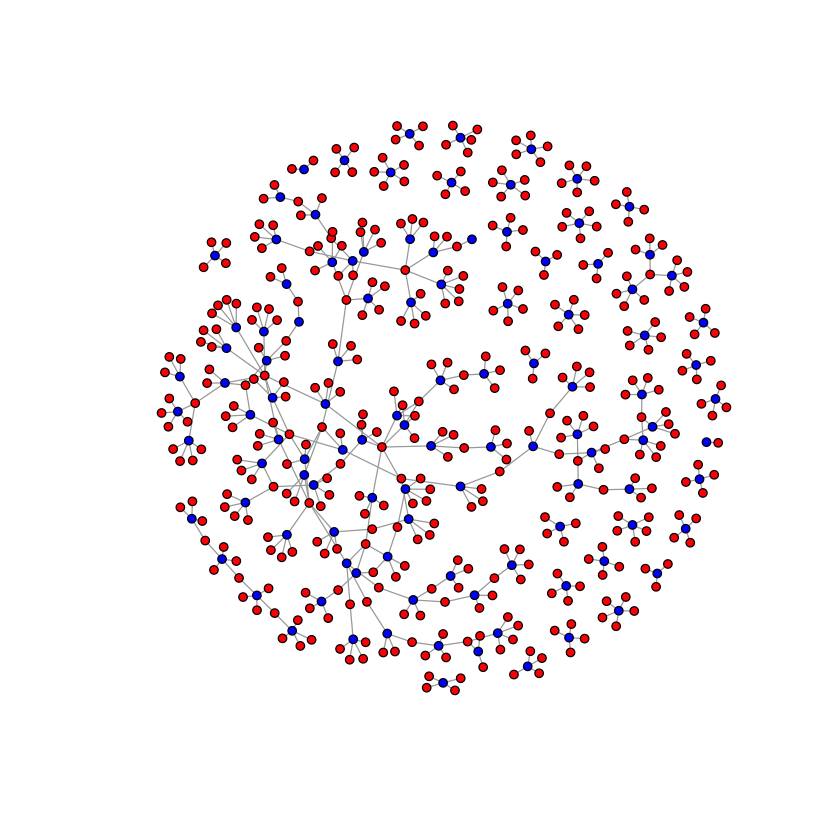

In [5]:
l <- layout_with_fr( network, grid = "nogrid" )
plot( network, vertex.label = NA, vertex.size = 3, edge.arrow.size = 0, layout = l )

In [6]:
V( network )$title <- V( network )$name
visIgraph( network ) %>%
 visInteraction(navigationButtons = TRUE) %>%
 visSave(file = "keywords_groups.html")

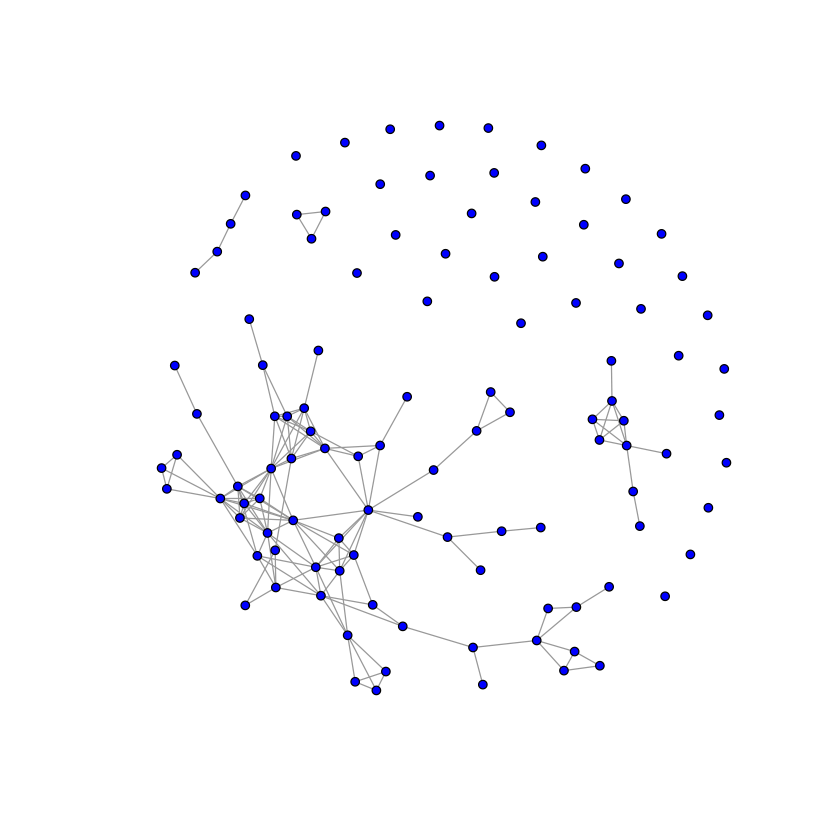

In [7]:
research_groups <- bipartite_projection( network , which = "true", remove.type = F)
l <- layout_with_fr( research_groups , grid = "nogrid" )
plot( research_groups, layout = l, vertex.label = NA, vertex.size = 3 )

In [8]:
V( research_groups )$title <- V( research_groups )$name
visIgraph( research_groups ) %>%
 visInteraction(navigationButtons = TRUE) %>%
 visSave(file = "kgroups.html")